In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('S-parameter anticrossings Rev5 Stas qubit #3.pkl', 'rb') as fhandle:
    data = pickle.load(fhandle)

In [4]:
parameter_names = data[1]['S-parameter'][0]
parameter_values = data[1]['S-parameter'][1]
measurement_result = data[1]['S-parameter'][2]

In [5]:
plt.pcolormesh(parameter_values[0], parameter_values[1], np.abs(measurement_result.T))

In [6]:
plt.pcolormesh(parameter_values[0], parameter_values[1], np.angle(measurement_result.T))

In [8]:
b=1j
eta = 1e9
wr = 6.585e9
wq = 6.582e9-5e9*parameter_values[0]
gamma = 0.1e6
kappa = 0.1e6
g = 4e6
t = 300e-9

S21_single_tone = lambda w: (b+eta/(kappa+1j*(wr-w)+g**2/(gamma+1j*(wq-w))))*np.exp(1j*w*t)



In [9]:
wq.shape

(401,)

In [10]:
w = np.reshape(parameter_values[1], (parameter_values[1].shape[0], 1))

In [11]:
S21 = S21_single_tone(w)

In [12]:
%matplotlib qt5

In [13]:
plt.imshow(np.abs(S21),cmap ='RdBu')

In [14]:
plt.imshow(np.angle(S21),cmap ='RdBu')

In [45]:
plt.pcolormesh(parameter_values[0], parameter_values[1], np.abs(S21),cmap ='RdBu'); plt.colorbar()

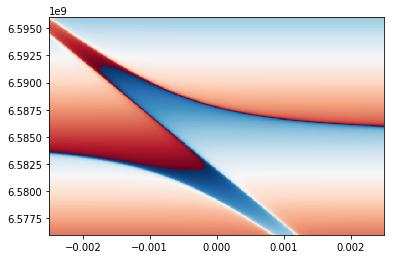

In [14]:
plt.pcolormesh(parameter_values[0], parameter_values[1], np.angle(S21),cmap ='RdBu')

In [15]:

b=1j
eta = 1e9
wr = 6.585e9
wq = 6.582e9-5e9*parameter_values[0]
gamma = 0.1e6
kappa = 0.1e6
g = 4e6
t = 300e-9




In [16]:
from scipy.optimize import least_squares

In [54]:
param=[-0.013, 0.042, 3e3, 2e3, 0.1e6, 0.1e6, 4.2e6, 300e-9, 6.5862e9,-10.5e9,6.574e9]
from ipywidgets import interactive
br, bi, etar, etai, kappa, gamma, g, t, wr, k, wq0 = param
w = np.reshape(parameter_values[1], (parameter_values[1].shape[0], 1))
B = np.reshape(parameter_values[0], (1, parameter_values[0].shape[0]))
wq = k*B+wq0
fun = (br+1j*bi-(etar+1j*etai)/(kappa-1j*(wr-w)+g**2/(gamma-1j*(wq-w))))*np.exp(-1j*w*t)-measurement_result.T
# print(np.real(fun))
plt.figure()
ax= plt.imshow(np.real(fun),cmap='RdBu')
# plt.figure(2)
# ax[1].imshow(np.angle(fun))
def plot(x_br, x_bi, x_etar, x_etai, x_kappa, x_gamma, x_g, x_t, x_wr,x_wq):
    new = (br+x_br+1j*(bi+x_bi)
           -(etar+x_etar+1j*(etai+
                                 x_etai))/(kappa+x_kappa-1j*(wr+x_wr-w)+
                                                            (g+x_g)**2/(gamma+x_gamma-1j*(wq+
                                                                                         x_wq-w))))*np.exp(-1j*w*(t+x_t))
    ax.set_data(np.real(new))    
#     ax.set_data(np.real(new))
#     plt.draw()
# #     return np.array([np.real(fun)])

interactive(plot,
            x_wr=(-1e9,1e9, 1e6),
            x_g=(-1e6,1e6, 1e5),
            x_br=(-1e-2,1e-2, 1e-4),
            x_bi=(-1e-2,1e-2, 1e-4),
            x_etar=(-1e3,1e3, 1e2),
            x_etai=(-1e3,1e3, 1e2),
            x_kappa=(-1e5,1e5, 1e4),
            x_gamma=(-1e5,1e5, 1e4),
            x_wq=(-1e9,1e9, 1e6),
            x_t=(-100e-9,100e-9, 10e-9),
           )

interactive(children=(FloatSlider(value=0.0, description='x_br', max=0.01, min=-0.01, step=0.0001), FloatSlider(value=0.0, description='x_bi', max=0.01, min=-0.01, step=0.0001), FloatSlider(value=0.0, description='x_etar', max=1000.0, min=-1000.0, step=100.0), FloatSlider(value=0.0, description='x_etai', max=1000.0, min=-1000.0, step=100.0), FloatSlider(value=0.0, description='x_kappa', max=100000.0, min=-100000.0, step=10000.0), FloatSlider(value=0.0, description='x_gamma', max=100000.0, min=-100000.0, step=10000.0), FloatSlider(value=0.0, description='x_g', max=1000000.0, min=-1000000.0, step=100000.0), FloatSlider(value=0.0, description='x_t', max=1e-07, min=-1e-07, step=1e-08), FloatSlider(value=0.0, description='x_wr', max=1000000000.0, min=-1000000000.0, step=1000000.0), FloatSlider(value=0.0, description='x_wq', max=1000000000.0, min=-1000000000.0, step=1000000.0), Output()), _dom_classes=('widget-interact',))

In [18]:
#говно
S21_single_tone = lambda w: (br+eta/(kappa+1j*(wr-w)+g**2/(gamma+1j*(wq-w))))*np.exp(1j*w*t)

def f(x):
    br, bi, etar, etai, kappa, gamma, g, t, wr, k, wq0 = x
    w = np.reshape(parameter_values[1], (parameter_values[1].shape[0], 1))
    B = np.reshape(parameter_values[0], (1, parameter_values[0].shape[0]))
    wq = k*B+wq0
    fun = (br+1j*bi-(etar+1j*etai)/(kappa-1j*(wr-w)+g**2/(gamma-1j*(wq-w))))*np.exp(-1j*w*t)-measurement_result.T
    return np.array([np.real(fun), np.imag(fun)]).ravel()
i=0
#('br', 'bi', 'eta', 'kappa', 'gamma', 'g', 't', 'wr', 'wq')
param=[-0.013, 0.042, 3e3, 2e3, 0.1e6, 0.1e6, 4.2e6, 300e-9, 6.5862e9,-10.5e9,6.574e9]    
result=least_squares(fun=f, 
                     x0=param, 
                     x_scale=[0.01, 0.01, 1e3, 1e3, 0.1e6, 0.1e6, 4.5e6, 300e-9, 6.585e9,5e9,6.583e9], 
                     verbose = 2)
                     #ftol = 2e2 )

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.7911e-01                                    1.53e+08    
       1             12         5.7549e-01      3.62e-03       1.69e+04       1.55e+08    
       2             13         5.6890e-01      6.58e-03       3.38e+04       1.64e+08    
       3             15         5.6559e-01      3.32e-03       1.69e+04       1.67e+08    
       4             16         5.5988e-01      5.71e-03       3.37e+04       1.79e+08    
       5             18         5.5691e-01      2.97e-03       1.69e+04       1.83e+08    
       6             19         5.5241e-01      4.50e-03       3.36e+04       1.99e+08    
       7             21         5.4993e-01      2.48e-03       1.69e+04       2.04e+08    
       8             22         5.4731e-01      2.62e-03       3.35e+04       2.25e+08    
       9             23         5.4699e-01      3.15e-04       3.32e+04       2.52e+08    

In [33]:
f_opt = np.reshape(f(param), (2, 401, 401))
f_final = f_opt[0,:,:]+f_opt[1,:,:]*1j+measurement_result.T
plt.figure()
plt.pcolormesh(parameter_values[0], parameter_values[1], np.real(f_final[:,:])); plt.colorbar()
plt.title('model real')
plt.figure()
plt.pcolormesh(parameter_values[0], parameter_values[1], np.real(measurement_result.T)); plt.colorbar()
plt.title('experiment real')
plt.figure()
plt.pcolormesh(parameter_values[0], parameter_values[1], np.imag(f_final[:,:])); plt.colorbar()
plt.figure()
plt.pcolormesh(parameter_values[0], parameter_values[1], np.imag(measurement_result.T)); plt.colorbar()